In [17]:
def linestyle_generator():
    linestyle = ["-","--","-.",";"]
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [18]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=":")
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [19]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both",ls=":")
    fig_ax[0].set_ylabel("Gain [dB]")

    fig_ax[1].grid(which="both",ls=":")
    fig_ax[1].set_xlabel("$\omega$ [rad/s]")
    fig_ax[1].set_ylabel("Phase [deg]")

    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [20]:
from control.matlab import*
import matplotlib.pyplot as plt
import numpy as np

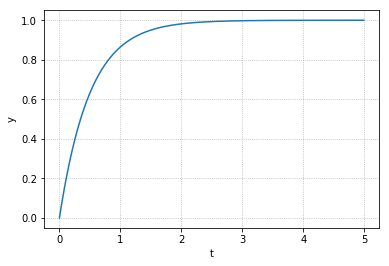

In [21]:
T, K = 0.5, 1
P = tf([0,K],[T,1])
y, t = step(P,np.arange(0,5,0.01))

fig, ax = plt.subplots()
ax.plot(t,y)
plot_set(ax,"t","y")

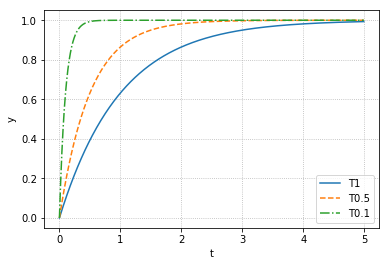

In [22]:
fig, ax = plt.subplots()
LS = linestyle_generator()

K = 1
T = (1,0.5,0.1)
for i in range(len(T)):
    y, t = step(tf([0,K],[T[i],1]), np.arange(0,5,0.01))
    ax.plot(t,y,ls = next(LS), label = "T"+str(T[i]))
plot_set(ax,"t","y","best")

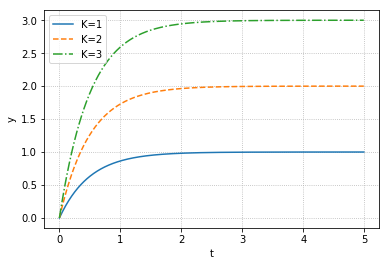

In [23]:
LS = linestyle_generator()
fig, ax = plt.subplots()

T = 0.5
K = [1, 2, 3]
for i in range(len(K)):
    y, t = step(tf([0,K[i]],[T,1]), np.arange(0, 5, 0.01))
    ax.plot(t,y,ls=next(LS),label="K="+str(K[i]))
plot_set(ax,"t","y","upper left")

In [27]:
import sympy as sp
sp.init_printing()
s = sp.Symbol("s")
T = sp.Symbol("T",real = True)
P = 1/((1+T*s)*s)
sp.apart(P,s)

ModuleNotFoundError: No module named 'sympy'